# Playing with the environment

## Imports

In [55]:
import os
import kaggle_environments
from kaggle_environments import make
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%config Completer.use_jedi = False

In [56]:
kaggle_environments.__version__

'1.7.11'

In [57]:
plt.plot()
plt.close('all')
plt.rcParams["figure.figsize"] = (30, 5)  
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

## Links

https://github.com/Kaggle/kaggle-environments
    
https://www.kaggle.com/kyazuki/simple-game-loop-towards-reinforcement-learning

## Tic tac toe

In [1]:
from kaggle_environments import make

# Setup a tictactoe environment.
env = make("tictactoe")

# Basic agent which marks the first available cell.
def my_agent(obs):
  return [c for c in range(len(obs.board)) if obs.board[c] == 0][0]

# Run the basic agent against a default agent which chooses a "random" move.
env.run([my_agent, "random"])

# Render an html ipython replay of the tictactoe game.
env.render(mode="ipython")

Loading environment football failed: No module named 'gfootball'


## Hungry geese

### First steps

In [2]:
env = make("hungry_geese")

In [4]:
%config Completer.use_jedi = False

In [6]:
env.run(["random", "random", 'greedy', 'greedy'])

[[{'action': 'NORTH',
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60,
    'step': 0,
    'geese': [[40], [72], [42], [36]],
    'food': [34, 17],
    'index': 0},
   'status': 'ACTIVE'},
  {'action': 'NORTH',
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60, 'index': 1},
   'status': 'ACTIVE'},
  {'action': 'NORTH',
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60, 'index': 2},
   'status': 'ACTIVE'},
  {'action': 'NORTH',
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60, 'index': 3},
   'status': 'ACTIVE'}],
 [{'action': 'WEST',
   'reward': 201,
   'info': {},
   'observation': {'remainingOverageTime': 60,
    'step': 1,
    'geese': [[39], [71], [31], [35]],
    'food': [34, 17],
    'index': 0},
   'status': 'ACTIVE'},
  {'action': 'WEST',
   'reward': 201,
   'info': {},
   'observation': {'remainingOverageTime': 60, 'index': 1},
   'status': 'ACTIVE'},
  {'action': 'N

In [7]:
env.render(mode="ipython")

In [5]:
env.re

{'random': <function kaggle_environments.envs.hungry_geese.hungry_geese.random_agent()>,
 'greedy': <function kaggle_environments.envs.hungry_geese.hungry_geese.greedy_agent(obs, config)>}

In [8]:
env.run([None, "random", 'greedy', 'greedy'])

[[{'action': 'NORTH',
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60,
    'step': 0,
    'geese': [[39], [62], [24], [61]],
    'food': [9, 74],
    'index': 0},
   'status': 'ACTIVE'},
  {'action': 'NORTH',
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60, 'index': 1},
   'status': 'ACTIVE'},
  {'action': 'NORTH',
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60, 'index': 2},
   'status': 'ACTIVE'},
  {'action': 'NORTH',
   'reward': 0,
   'info': {},
   'observation': {'remainingOverageTime': 60, 'index': 3},
   'status': 'ACTIVE'}],
 [{'action': 'NORTH',
   'reward': 201,
   'info': {},
   'observation': {'remainingOverageTime': 60,
    'step': 1,
    'geese': [[28], [63], [13], [72]],
    'food': [9, 74],
    'index': 0},
   'status': 'ACTIVE'},
  {'action': 'EAST',
   'reward': 201,
   'info': {},
   'observation': {'remainingOverageTime': 60, 'index': 1},
   'status': 'ACTIVE'},
  {'action': 'NO

In [9]:
env.render(mode="ipython")

### Can I play the environment?

In [2]:
env = make("hungry_geese")

In [14]:
env.play([None, "random"])

When I hit the move keys it says processing but it does not update the screen.

## Getting the state

In [2]:
env = make("hungry_geese")

In [3]:
observations = env.reset(num_agents=4)

In [4]:
observations

[{'action': 'NORTH',
  'reward': 0,
  'info': {},
  'observation': {'remainingOverageTime': 60,
   'step': 0,
   'geese': [[76], [75], [44], [40]],
   'food': [48, 65],
   'index': 0},
  'status': 'ACTIVE'},
 {'action': 'NORTH',
  'reward': 0,
  'info': {},
  'observation': {'remainingOverageTime': 60, 'index': 1},
  'status': 'ACTIVE'},
 {'action': 'NORTH',
  'reward': 0,
  'info': {},
  'observation': {'remainingOverageTime': 60, 'index': 2},
  'status': 'ACTIVE'},
 {'action': 'NORTH',
  'reward': 0,
  'info': {},
  'observation': {'remainingOverageTime': 60, 'index': 3},
  'status': 'ACTIVE'}]

In [5]:
env.render(mode="ipython")

Can I generate the same board from the observations?

In [10]:
def simple_board(observations):
    flat_board = np.zeros((11*7))
    for geese in observations[0]['observation']['geese']:
        flat_board[geese] = 1
    flat_board[observations[0]['observation']['food']] = 2
    board = np.reshape(flat_board, (7, 11))
    return board

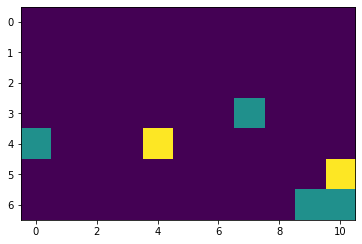

In [11]:
board = simple_board(observations)
plt.imshow(board);

In [12]:
ret = env.run(['greedy', 'greedy', 'greedy', 'greedy'])

In [15]:
env.render(mode="ipython")

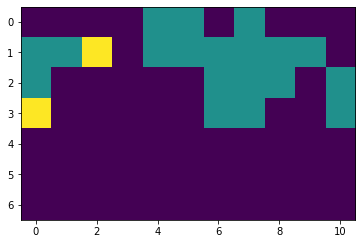

In [17]:
board = simple_board(ret[33])
plt.imshow(board);

This works, but this representation is not good enough. I don't know where is the head, and I don't know the separation between agents.

I could use colors, but I don't think that is the best for the model. Probably using different channels for the agents is the best option.

To be able to do that I need to know if the number of agents is constant.

## More advanced representation

In [4]:
env = make("hungry_geese")
ret = env.run(['greedy', 'greedy', 'greedy', 'greedy'])

In [37]:
def better_board(observations):
    channels = np.zeros((11*7, 5), dtype=np.uint8)
    for idx, geese in enumerate(observations[0]['observation']['geese']):
        if geese:
            channels[geese[0], idx] = 2
            channels[geese[1:], idx] = 1
    channels[observations[0]['observation']['food'], -1] = 1
    channels = np.reshape(channels, (7, 11, 5))
    return channels_to_board(channels)

def channels_to_board(channels):
    board = np.zeros((7, 11, 3), dtype=np.uint8)
    board += np.repeat(channels[:, :, 0:1], axis=2, repeats=3)*np.array([125, 0, 0], dtype=np.uint8)
    board += np.repeat(channels[:, :, 1:2], axis=2, repeats=3)*np.array([0, 125, 0], dtype=np.uint8)
    board += np.repeat(channels[:, :, 2:3], axis=2, repeats=3)*np.array([0, 0, 125], dtype=np.uint8)
    board += np.repeat(channels[:, :, 3:4], axis=2, repeats=3)*np.array([0, 125, 125], dtype=np.uint8)
    
    board += np.repeat(channels[:, :, 4:5], axis=2, repeats=3)*np.array([255, 255, 255], dtype=np.uint8)
    return board

In [6]:
env.render(mode="ipython")

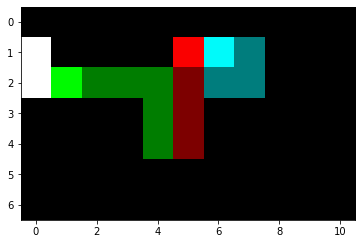

In [39]:
board = better_board(ret[33])
plt.imshow(board);

This is much better, now I can differentiate between the different geese and I know where the heads are. However it is not completely defined, for example the square of the blue goose could have two different configurations. 

### Showing start and end of the geese

In [3]:
env = make("hungry_geese")
ret = env.run(['greedy', 'greedy', 'greedy', 'greedy'])

In [8]:
def better_board(observations):
    channels = np.zeros((11*7, 5), dtype=np.uint8)
    for idx, geese in enumerate(observations[0]['observation']['geese']):
        if geese:
            channels[geese[1:], idx] = 2
            channels[geese[-1], idx] = 1
            channels[geese[0], idx] = 3
            
    channels[observations[0]['observation']['food'], -1] = 1
    channels = np.reshape(channels, (7, 11, 5))
    return channels_to_board(channels)

def channels_to_board(channels):
    board = np.zeros((7, 11, 3), dtype=np.uint8)
    board += np.repeat(channels[:, :, 0:1], axis=2, repeats=3)*np.array([85, 0, 0], dtype=np.uint8)
    board += np.repeat(channels[:, :, 1:2], axis=2, repeats=3)*np.array([0, 85, 0], dtype=np.uint8)
    board += np.repeat(channels[:, :, 2:3], axis=2, repeats=3)*np.array([0, 0, 85], dtype=np.uint8)
    board += np.repeat(channels[:, :, 3:4], axis=2, repeats=3)*np.array([0, 85, 85], dtype=np.uint8)
    
    board += np.repeat(channels[:, :, 4:5], axis=2, repeats=3)*np.array([255, 255, 255], dtype=np.uint8)
    return board

In [5]:
env.render(mode="ipython")

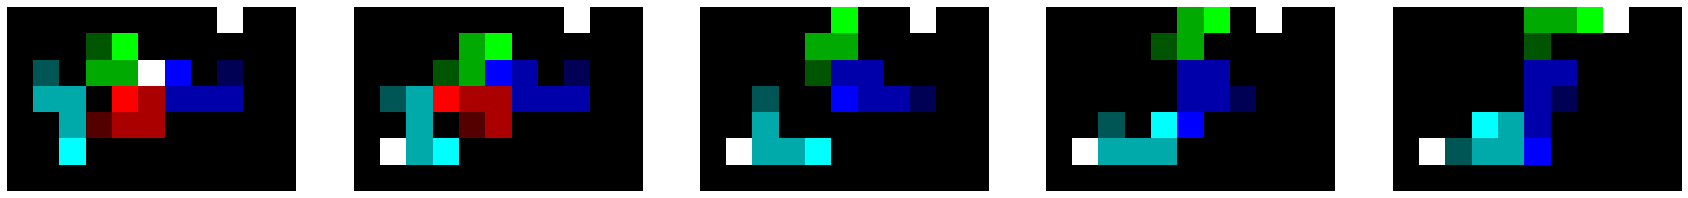

In [18]:
steps = list(range(27, 32))
for step in steps:
    board = better_board(ret[step])
    plt.subplot(1, len(steps), steps.index(step)+1)
    plt.imshow(board);
    plt.axis('off')

I think this representation captures all the relevant information. Maybe for the network I could give the head and tail position on different channels to ease learning.

### Egocentric view

In the egocentric view we take the head position of the goose and place it on the center of the board.

In [39]:
def egocentric_board(observations, geese_idx):
    channels = np.zeros((11*7, 5), dtype=np.uint8)
    for idx, geese in enumerate(observations[0]['observation']['geese']):
        if geese:
            channels[geese[1:], idx] = 2
            channels[geese[-1], idx] = 1
            channels[geese[0], idx] = 3
            
    channels[observations[0]['observation']['food'], -1] = 1
    channels = np.reshape(channels, (7, 11, 5))
    board = channels_to_board(channels)
    board = make_board_egocentric(board, observations[0]['observation']['geese'][geese_idx])
    return board

def make_board_egocentric(board, goose):
    """ Modifies the view of the board so the goose head is at the center (3, 5)"""
    if goose:
        head = goose[0]
        row, col = get_head_position(head)
        board = center_rows(row, board)
        board = center_cols(col, board)
    return board

def center_rows(row, board):
    new_board = board.copy()
    if row < 3:
        offset = 3 - row
        new_board[offset:] = board[:-offset]
        new_board[:offset] = board[-offset:]
    elif row > 3:
        offset = row - 3
        new_board[:-offset] = board[offset:]
        new_board[-offset:] = board[:offset]
    return new_board

def center_cols(col, board):
    new_board = board.copy()
    if col < 5:
        offset = 5 - col
        new_board[:, offset:] = board[:, :-offset]
        new_board[:, :offset] = board[:, -offset:]
    elif col > 5:
        offset = col - 5
        new_board[:, :-offset] = board[:, offset:]
        new_board[:, -offset:] = board[:, :offset]
    return new_board

def get_head_position(head):
    row = head//11
    col = head - row*11
    return row, col

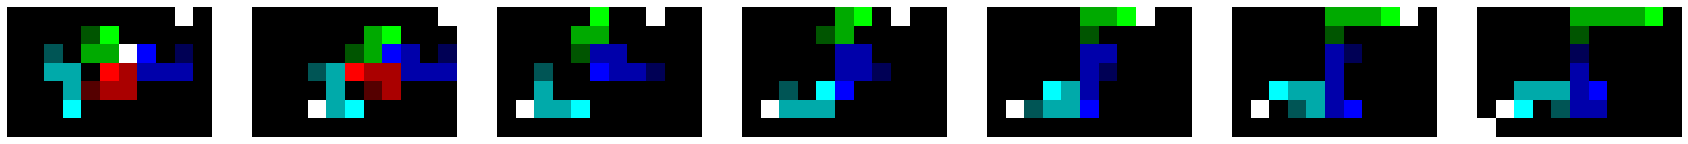

In [48]:
goose_idx = 0
steps = list(range(27, 34))
for step in steps:
    board = egocentric_board(ret[step], goose_idx)
    plt.subplot(1, len(steps), steps.index(step)+1)
    plt.imshow(board);
    plt.axis('off')

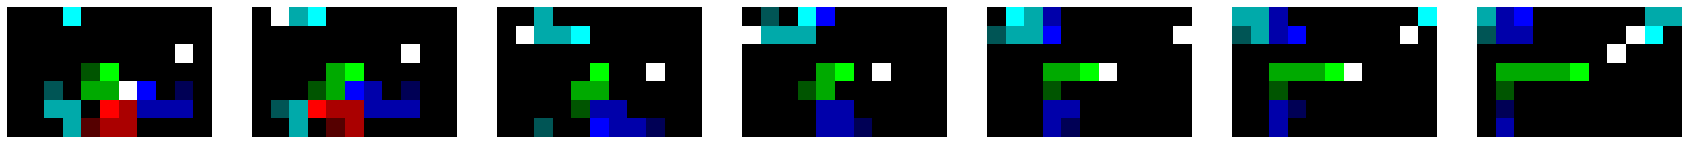

In [45]:
goose_idx = 1
steps = list(range(27, 34))
for step in steps:
    board = egocentric_board(ret[step], goose_idx)
    plt.subplot(1, len(steps), steps.index(step)+1)
    plt.imshow(board);
    plt.axis('off')

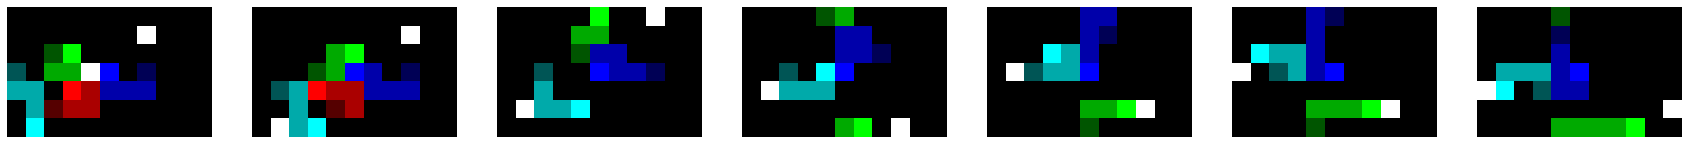

In [46]:
goose_idx = 2
steps = list(range(27, 34))
for step in steps:
    board = egocentric_board(ret[step], goose_idx)
    plt.subplot(1, len(steps), steps.index(step)+1)
    plt.imshow(board);
    plt.axis('off')

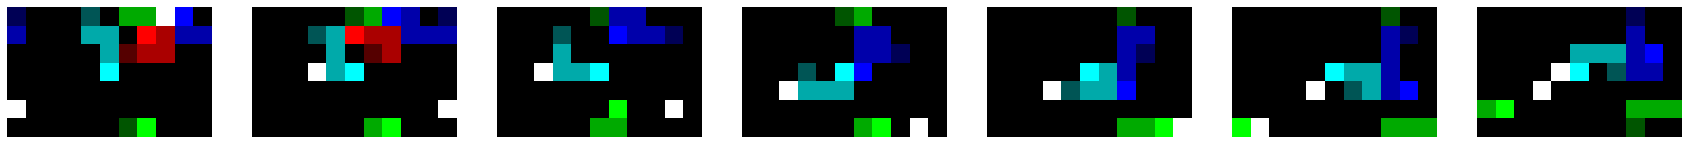

In [47]:
goose_idx = 3
steps = list(range(27, 34))
for step in steps:
    board = egocentric_board(ret[step], goose_idx)
    plt.subplot(1, len(steps), steps.index(step)+1)
    plt.imshow(board);
    plt.axis('off')

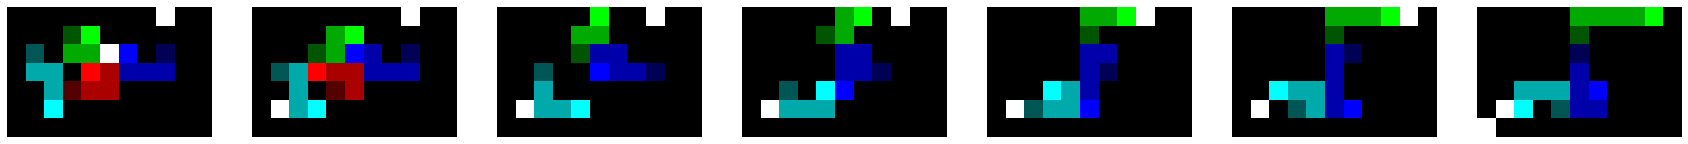

In [49]:
steps = list(range(27, 34))
for step in steps:
    board = better_board(ret[step])
    plt.subplot(1, len(steps), steps.index(step)+1)
    plt.imshow(board);
    plt.axis('off')

Creating a video with all the frames will be nice.

In [59]:
goose_idx = 2
folder = 'frames_%i' % goose_idx
os.makedirs(folder, exist_ok=True)

steps = list(range(len(ret)))
#steps = list(range(10))
plt.figure(figsize=(11, 7))

for step in steps:
    board = egocentric_board(ret[step], goose_idx)
    plt.imshow(board);
    plt.axis('off')
    plt.savefig('%s/%03d.png' % (folder, step))
plt.close('all')